# **TextTorch - 01: Preprocessamento de Dados**

**Objetivo:** Carregar, limpar e preparar os datasets para o pipeline de classificação de texto.

### **Como Executar (Google Colab)**

1. **Ambiente:** Certifique-se de que o ambiente de execução está configurado (`Ambiente de execução` > `Alterar tipo de ambiente de execução` > `GPU`).
2. **Repositório:** Clone o repositório do projeto e instale as dependências.
   ```bash
   !git clone https://github.com/takaokensei/TextTorch.git
   %cd TextTorch
   !pip install -r requirements.txt
   ```
3. **Dataset (Opcional):** Se for usar o dataset customizado, faça o upload do arquivo `Base_dados_textos_6_classes.csv` para a pasta `raw/`.
4. **Execução:** Execute todas as células deste notebook (`Ambiente de execução` > `Executar tudo`).

In [15]:
# Imports e Configurações Iniciais
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Adiciona o diretório 'src' ao path para importar módulos
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from preprocessing import prepare_dataset, set_seed
from model import load_config

# Configurações
CONFIG_PATH = '../models/config.yaml'
config = load_config(CONFIG_PATH)
set_seed(config['seed'])

print("Ambiente configurado com sucesso!")

2025-11-13 17:33:27,836 - INFO - Configuração carregada de: ../models/config.yaml
2025-11-13 17:33:27,837 - INFO - Seeds definidas: 42


Ambiente configurado com sucesso!


## 1. Carregamento e Preparação do Dataset

A função `prepare_dataset` do módulo `src/preprocessing.py` centraliza o carregamento, limpeza e divisão dos dados. Ela suporta:
- **20 Newsgroups:** Baixado automaticamente via `scikit-learn`.
- **CSV Customizado:** Carrega `raw/Base_dados_textos_6_classes.csv`.

**Importante:** Use apenas um dataset por vez. Configure qual dataset usar em `models/config.yaml` (opção `dataset`).

Vamos carregar os dados conforme a configuração em `models/config.yaml`.

In [27]:
try:
    dataset = prepare_dataset(
        dataset_choice=config['dataset'],
        csv_path='../raw/Base_dados_textos_6_classes.csv',
        csv_text_col='Texto Expandido',  # Nome da coluna de texto no CSV
        csv_label_col='Classe',  # Nome da coluna de label no CSV
        test_size=config['test_size'],
        val_size=config['val_size'],
        seed=config['seed']
    )
    print(f"Dataset '{config['dataset']}' carregado com sucesso.")
except FileNotFoundError as e:
    print(f"\nERRO: {e}")
    print("\nPor favor, verifique se o arquivo CSV está no local correto ou altere a configuração 'dataset' em config.yaml para '20newsgroups'.")
except ValueError as e:
    print(f"\nERRO: {e}")
    print("\nPor favor, verifique se as colunas do CSV estão corretas ou ajuste os parâmetros csv_text_col e csv_label_col.")

2025-11-13 17:33:42,258 - INFO - Seeds definidas: 42
2025-11-13 17:33:42,259 - INFO - Carregando CSV customizado: ../raw/Base_dados_textos_6_classes.csv
2025-11-13 17:33:42,263 - INFO - CSV carregado: 315 documentos, 6 classes únicas
2025-11-13 17:33:42,264 - INFO - CSV customizado carregado: 315 documentos
2025-11-13 17:33:42,265 - INFO - Preprocessando 315 textos...
2025-11-13 17:33:42,270 - INFO - Preprocessamento concluído
2025-11-13 17:33:42,273 - INFO - Dataset preparado:
2025-11-13 17:33:42,274 - INFO -   Train: 252 documentos
2025-11-13 17:33:42,274 - INFO -   Val: 31 documentos
2025-11-13 17:33:42,275 - INFO -   Test: 32 documentos
2025-11-13 17:33:42,275 - INFO -   Classes: 6


Dataset 'custom_csv' carregado com sucesso.


## 2. Análise Exploratória

Vamos verificar a estrutura dos dados carregados e a distribuição das classes.

In [4]:
# Exibe informações sobre os splits
print(f"Número de amostras de treino: {len(dataset['X_train'])}")
print(f"Número de amostras de validação: {len(dataset['X_val'])}")
print(f"Número de amostras de teste: {len(dataset['X_test'])}")
print(f"Número total de classes: {dataset['n_classes']}")

# Exemplo de texto pré-processado
print("\n--- Exemplo de Texto (Treino) ---")
print(dataset['X_train'][0])

Número de amostras de treino: 252
Número de amostras de validação: 31
Número de amostras de teste: 32
Número total de classes: 6

--- Exemplo de Texto (Treino) ---
a representação parlamentar de minorias constitui processo fundamental de ampliação democrática  busca garantir visibilidade política para grupos historicamente marginalizados  promove pluralidade e diversidade nos espaços de decisão política  desafia estruturas tradicionais de poder e representação  representa instrumento de inclusão e reconhecimento de diferenças


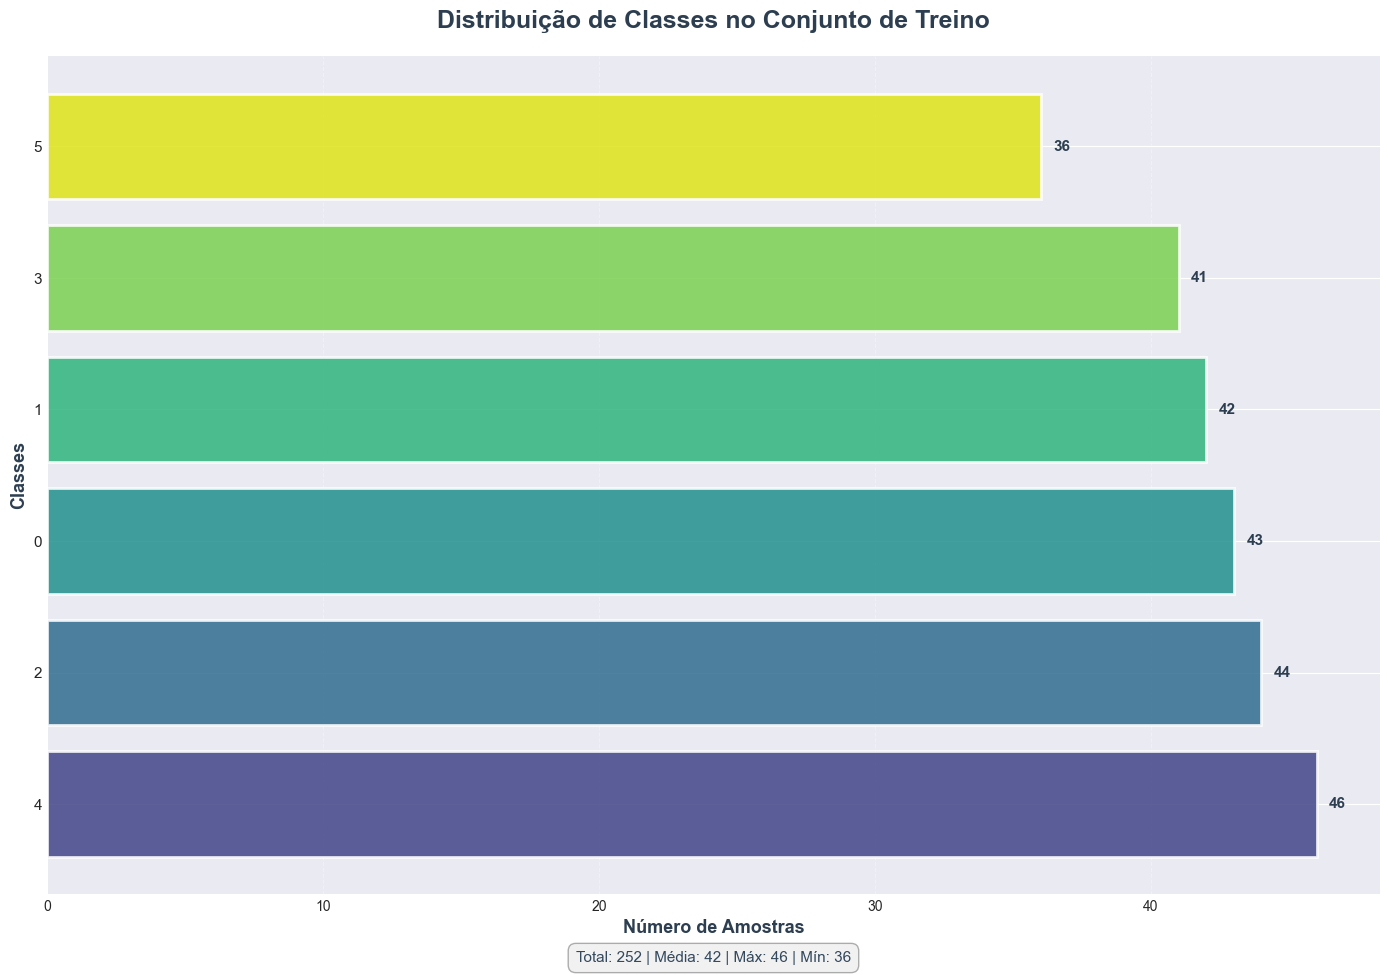

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Configurar estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Criar figura com fundo elegante
fig, ax = plt.subplots(figsize=(14, 10), facecolor='white')

# Preparar dados
df_train = pd.DataFrame({
    'label_idx': dataset['y_train'],
    'label_name': [dataset['idx_to_label'][idx] for idx in dataset['y_train']]
})

class_counts = df_train['label_name'].value_counts()

# Criar gradiente de cores vibrante
colors = plt.cm.viridis(np.linspace(0.2, 0.95, len(class_counts)))

# Criar gráfico de barras horizontal
bars = ax.barh(
    range(len(class_counts)), 
    class_counts.values,
    color=colors,
    edgecolor='white',
    linewidth=2,
    alpha=0.85
)

# Adicionar valores nas barras
for i, (bar, count) in enumerate(zip(bars, class_counts.values)):
    width = bar.get_width()
    ax.text(
        width + max(class_counts.values) * 0.01,
        bar.get_y() + bar.get_height()/2,
        f'{count:,}',
        ha='left',
        va='center',
        fontsize=11,
        fontweight='bold',
        color='#2c3e50'
    )

# Configurar eixos e labels
ax.set_yticks(range(len(class_counts)))
ax.set_yticklabels(class_counts.index, fontsize=11)
ax.set_xlabel('Número de Amostras', fontsize=13, fontweight='bold', color='#2c3e50')
ax.set_ylabel('Classes', fontsize=13, fontweight='bold', color='#2c3e50')

# Título com estilo
ax.set_title(
    'Distribuição de Classes no Conjunto de Treino',
    fontsize=18,
    fontweight='bold',
    color='#2c3e50',
    pad=20
)

# Grid sutil
ax.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.8)
ax.set_axisbelow(True)

# Adicionar informações estatísticas
total_samples = len(dataset['y_train'])
avg_samples = total_samples / len(class_counts)
max_samples = class_counts.max()
min_samples = class_counts.min()

stats_text = f'Total: {total_samples:,} | Média: {avg_samples:.0f} | Máx: {max_samples:,} | Mín: {min_samples:,}'
ax.text(
    0.5, -0.08,
    stats_text,
    transform=ax.transAxes,
    ha='center',
    fontsize=11,
    bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.3),
    color='#34495e'
)

# Ajustar layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.1)

# Remover bordas superiores e direitas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

plt.show()

## 3. Smoke Test (Teste Rápido)

Para garantir que o pipeline está funcionando, realizamos um "smoke test" com uma pequena amostra dos dados. Isso verifica se as funções de preprocessamento rodam sem erros em um subconjunto dos dados.

In [13]:
print("--- Iniciando Smoke Test ---")

# Pega uma amostra pequena (200 exemplos)
sample_size = 200
X_sample = dataset['X_train'][:sample_size]
y_sample = dataset['y_train'][:sample_size]

print(f"Tamanho da amostra: {len(X_sample)} documentos.")

# Verifica se não há erros
try:
    # Apenas verificamos se os dados são acessíveis e têm o formato esperado
    assert isinstance(X_sample, list)
    assert isinstance(y_sample, list)
    assert len(X_sample) == sample_size
    print("Smoke test concluído com sucesso: os dados foram carregados e formatados corretamente.")
except Exception as e:
    print(f"ERRO no smoke test: {e}")

--- Iniciando Smoke Test ---
Tamanho da amostra: 200 documentos.
Smoke test concluído com sucesso: os dados foram carregados e formatados corretamente.


## 4. Salvando o Dataset Processado (Opcional)

Para acelerar os próximos notebooks, podemos salvar o dicionário `dataset` processado em um arquivo. Isso evita a necessidade de reprocessar os textos a cada execução.

In [14]:
import pickle

SAVE_PATH = '../artifacts/processed_dataset.pkl'

os.makedirs(os.path.dirname(SAVE_PATH), exist_ok=True)

with open(SAVE_PATH, 'wb') as f:
    pickle.dump(dataset, f)

print(f"Dataset processado salvo em: {SAVE_PATH}")

Dataset processado salvo em: ../artifacts/processed_dataset.pkl
